In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [37]:
data = {
    'Highest Temperature': [25, 26, 24, 27, 25, 26, 24, 27, 25, 26, 24, 27, 25, 26, 24, 27],
    'Lowest Temperature': [10, 12, 11, 13, 10, 12, 11, 13, 10, 12, 11, 13, 10, 12, 11, 13],
    'Rainfall': [400, 380, 410, 390, 400, 380, 410, 390, 400, 380, 410, 390, 400, 380, 410, 390],
    'Humidity': [60, 62, 58, 63, 60, 62, 58, 63, 60, 62, 58, 63, 60, 62, 58, 63],
    'Crop Yield': [2500, 2550, 2450, 2600, 2500, 2550, 2450, 2600, 2500, 2550, 2450, 2600, 2500, 2550, 2450, 2600],
    'Irrigation Frequency': [15, 16, 14, 17, 15, 16, 14, 17, 15, 16, 14, 17, 15, 16, 14, 17]
}

df = pd.DataFrame(data)


In [38]:
X = df.drop('Crop Yield', axis=1)
y = df['Crop Yield']


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
k = 5  # Number of neighbors to consider
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)


KNeighborsRegressor()

In [42]:
y_pred = knn.predict(X_test)


In [43]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 650.0
R2 Score: 0.6218181818181818


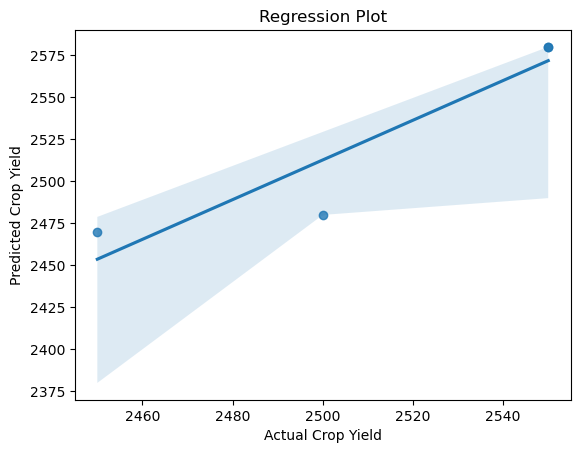

In [45]:
# Combine the test data and predictions into a DataFrame
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Create a regression plot
sns.regplot(x='Actual', y='Predicted', data=results)

# Set plot labels
plt.xlabel('Actual Crop Yield')
plt.ylabel('Predicted Crop Yield')
plt.title('Regression Plot')

# Show the plot
plt.show()


In [47]:
# User input for prediction
user_input = {
    'Highest Temperature': [25],
    'Lowest Temperature': [10],
    'Rainfall': [400],
    'Humidity': [60],
    'Irrigation Frequency': [15]
}

user_df = pd.DataFrame(user_input)

# Predict the crop yield for user input values
user_pred = knn.predict(user_df)
print("Predicted Yield for User Input:", user_pred[0])

Predicted Yield for User Input: 2480.0
